In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('nasdaq100.csv', sep=';')

In [5]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [6]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [8]:
df = df.drop(columns = ['Date'])

In [9]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

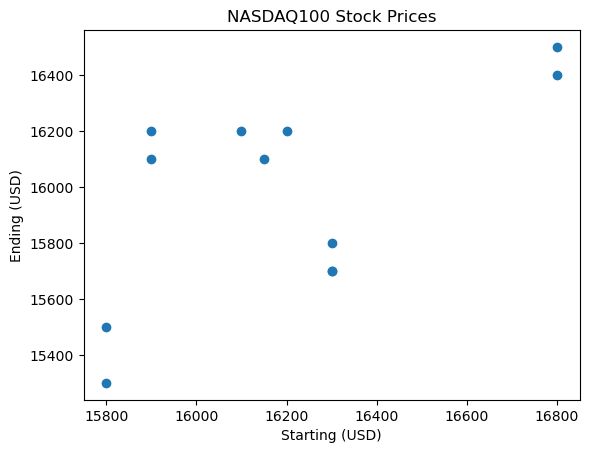

In [13]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [15]:
x = df.drop('Ending (USD)', axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [16]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [18]:
## Linear Regression
from sklearn.linear_model import LinearRegression 

In [24]:
reg = LinearRegression()

In [19]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [20]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

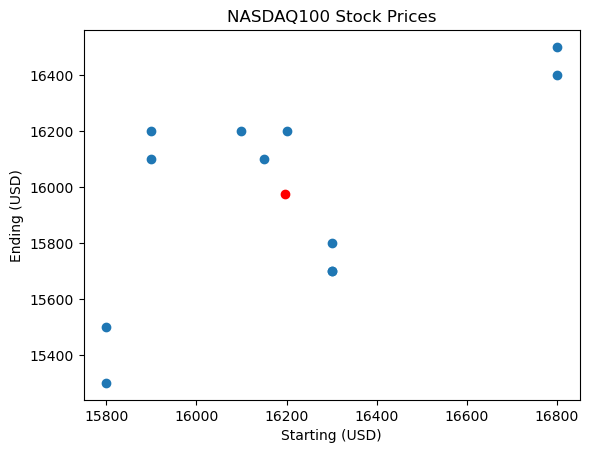

In [22]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [26]:
reg.fit(x, y) #train the ml model

LinearRegression()

In [27]:
m = reg.coef_
m

array([[0.65258293]])

In [28]:
c = reg.intercept_
c


array([5405.87555702])

In [29]:
# y = mx + c
m*16700 + c

array([[16304.0105628]])

In [30]:
reg.predict([[16700]])


G:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [31]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

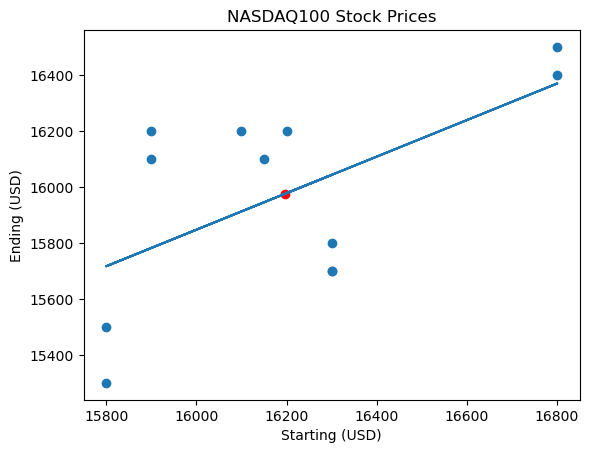

In [32]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [34]:
reg.predict([[16600]])
df.head()

G:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
